In [145]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import sklearn 
import pandas as pd
import csv
import joblib

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

## Dataset
Valeurs des features et labels dans 2 fichiers différents

In [146]:
df_attributes = pd.read_csv('db_cali/alt_acsincome_ca_features_85(1).csv')
df_labels = pd.read_csv('db_cali/alt_acsincome_ca_labels_85.csv')

df_attributes

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
0,41.0,4.0,24.0,1.0,2555.0,6.0,1.0,60.0,2.0,1.0
1,77.0,7.0,22.0,1.0,4920.0,39.0,0.0,35.0,1.0,1.0
2,38.0,1.0,18.0,1.0,440.0,6.0,1.0,50.0,1.0,1.0
3,30.0,1.0,22.0,5.0,1555.0,6.0,2.0,80.0,1.0,6.0
4,36.0,1.0,16.0,1.0,4030.0,314.0,1.0,70.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
166310,25.0,1.0,20.0,1.0,4720.0,6.0,7.0,8.0,2.0,1.0
166311,34.0,1.0,22.0,1.0,110.0,210.0,0.0,40.0,1.0,6.0
166312,54.0,3.0,18.0,1.0,7700.0,6.0,1.0,50.0,1.0,1.0
166313,39.0,1.0,16.0,5.0,9130.0,6.0,0.0,50.0,1.0,1.0


In [147]:
df_labels

,PINCP
0,True
1,True
2,False
3,True
4,False
...,...
166310,False
166311,True
166312,True
166313,True


(array([1.35137087e-02, 1.96778840e-02, 2.25452328e-02, 2.26404987e-02,
        2.24921337e-02, 2.10522124e-02, 1.47568512e-02, 2.01417198e-02,
        2.15129247e-02, 2.13520658e-02, 2.03041404e-02, 1.72681241e-02,
        1.09696394e-02, 4.86168673e-03, 3.43269754e-03, 1.80692950e-03,
        8.21473569e-04, 3.59199469e-04, 1.57735419e-04, 7.34016307e-05]),
 array([17.  , 20.85, 24.7 , 28.55, 32.4 , 36.25, 40.1 , 43.95, 47.8 ,
        51.65, 55.5 , 59.35, 63.2 , 67.05, 70.9 , 74.75, 78.6 , 82.45,
        86.3 , 90.15, 94.  ]),
 <BarContainer object of 20 artists>)

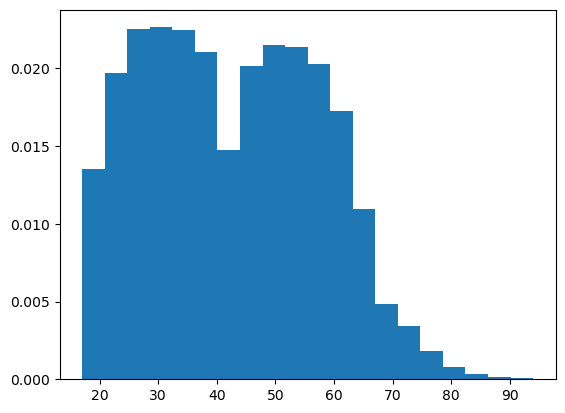

In [148]:
plt.hist(df_attributes["AGEP"], bins=20, density=True)
# todo: change y values for percentages ?

(array([7.73299161e-01, 5.48657668e-02, 8.25992845e-03, 9.01903015e-05,
        0.00000000e+00, 2.90112137e-03, 2.08174248e-01, 4.05104771e-03,
        1.45777591e-01, 5.25809458e-02]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

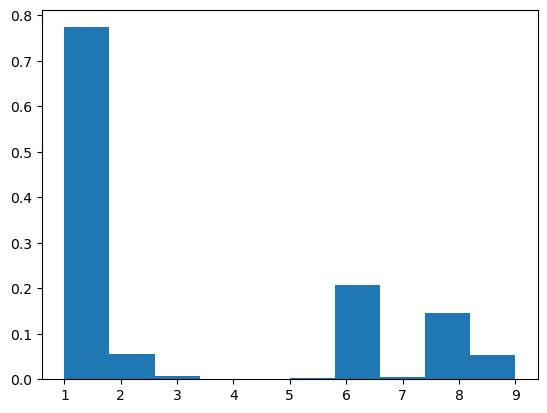

In [149]:
plt.hist(df_attributes["RAC1P"], density=True)

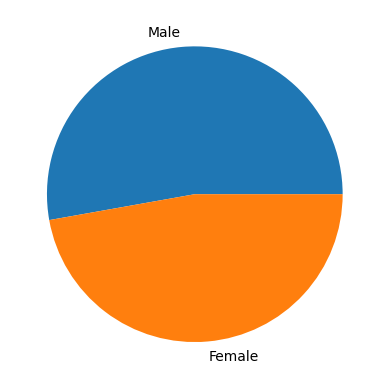

In [150]:
count = df_attributes.SEX.value_counts()
labels = ['Male', 'Female']
plt.pie(count, labels=labels)
plt.show()

(array([0.93302296, 0.1007125 , 0.11546935, 0.        , 0.06063365,
        0.03671175, 0.        , 0.12161947, 0.0562358 , 0.00416593]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

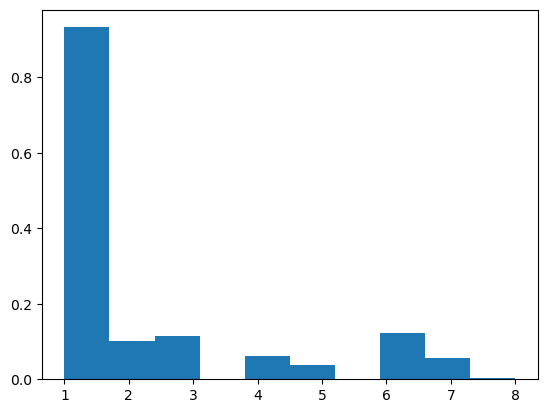

In [151]:
# extra: import geopandas as gpd
plt.hist(df_attributes["COW"], density=True)


(array([0.00785832, 0.00083655, 0.00216195, 0.00945299, 0.00771715,
        0.01059017, 0.09267642, 0.10048507, 0.13826827, 0.06473572]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <BarContainer object of 10 artists>)

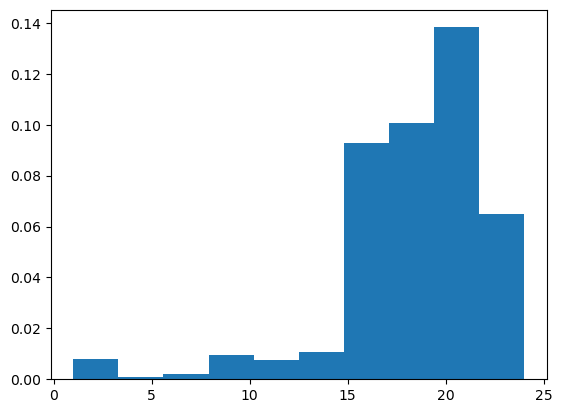

In [152]:
plt.hist(df_attributes["SCHL"], density=True)

(array([1.30963834, 0.        , 0.04208881, 0.        , 0.        ,
        0.22628747, 0.        , 0.04852238, 0.        , 0.87346301]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

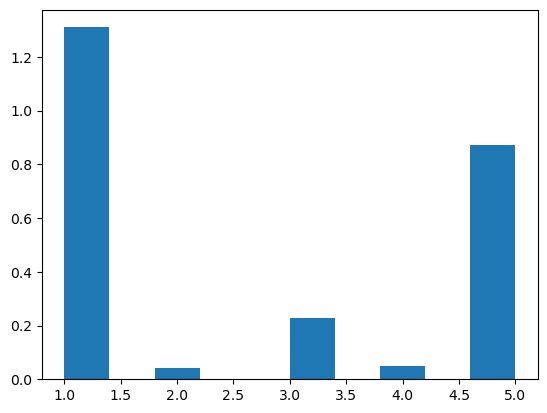

In [153]:
plt.hist(df_attributes["MAR"], density=True)

(array([1.70320680e-04, 7.42034124e-05, 1.25501060e-04, 1.04970980e-04,
        2.14350446e-04, 1.21808952e-04, 6.16269779e-05, 3.83844535e-05,
        2.44364897e-05, 8.27264877e-05]),
 array([  10.,  992., 1974., 2956., 3938., 4920., 5902., 6884., 7866.,
        8848., 9830.]),
 <BarContainer object of 10 artists>)

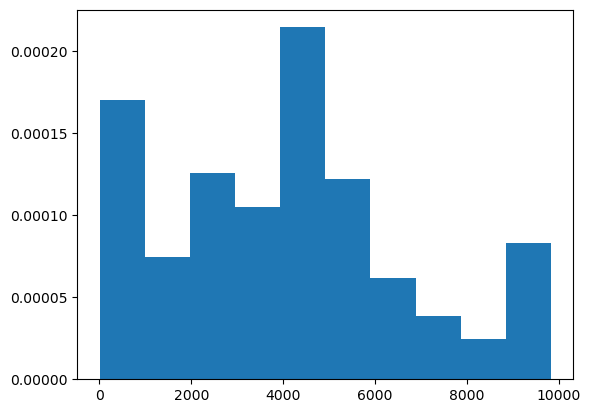

In [154]:
plt.hist(df_attributes["OCCP"], density=True)

(array([1.21657420e-02, 1.64180055e-04, 3.60869935e-04, 1.25461831e-03,
        1.18035674e-03, 2.61829132e-03, 1.75487820e-04, 8.00241856e-05,
        3.16399973e-05, 5.19722292e-05]),
 array([  1. ,  56.3, 111.6, 166.9, 222.2, 277.5, 332.8, 388.1, 443.4,
        498.7, 554. ]),
 <BarContainer object of 10 artists>)

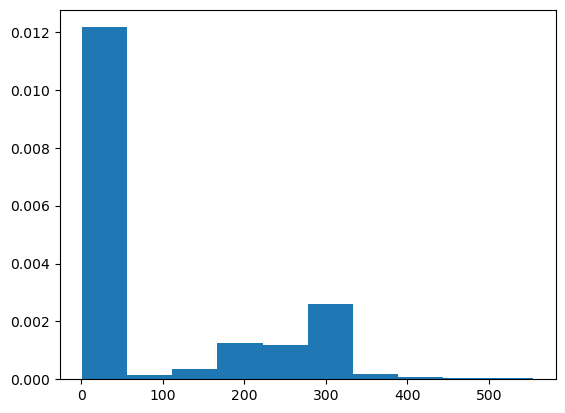

In [155]:
plt.hist(df_attributes["POBP"], density=True)

(array([0.40398535, 0.07859996, 0.01405908, 0.00583938, 0.00543971,
        0.01454717, 0.0048632 , 0.03719024, 0.00780235, 0.01590886]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

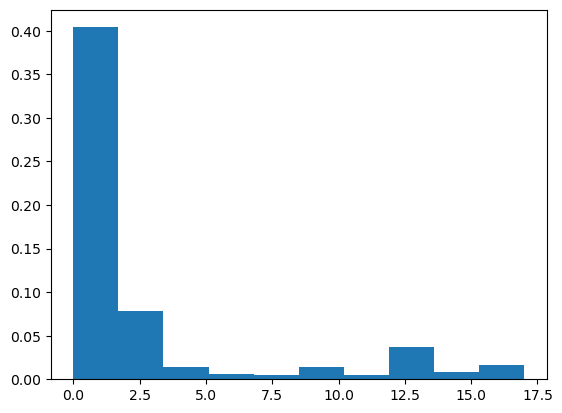

In [156]:
plt.hist(df_attributes["RELP"], density=True)

(array([0.00440583, 0.00921352, 0.01070442, 0.05470195, 0.00711644,
        0.00991725, 0.00408311, 0.00094301, 0.0006479 , 0.00030738]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

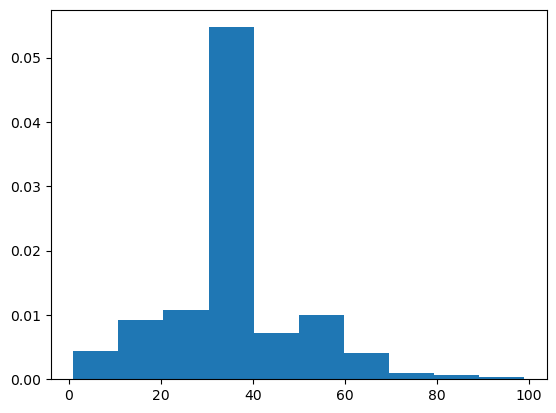

In [157]:
plt.hist(df_attributes["WKHP"], density=True)

### Partitionner le jeu de données

On garde 20% du dataset pour la phase de test, et 10% pour la validation. La fonction train_test_split randomise automatiquement la répartition des lignes entre train et test.

In [158]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_attributes, df_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

X_train


,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
165496,35.0,1.0,21.0,5.0,1306.0,6.0,13.0,40.0,1.0,1.0
157067,43.0,1.0,21.0,1.0,310.0,247.0,1.0,40.0,1.0,6.0
36293,38.0,1.0,19.0,5.0,8225.0,6.0,2.0,46.0,1.0,8.0
151543,42.0,1.0,19.0,1.0,705.0,6.0,1.0,40.0,1.0,2.0
148747,32.0,2.0,21.0,4.0,2145.0,27.0,0.0,60.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
20563,22.0,1.0,19.0,5.0,3500.0,247.0,10.0,40.0,2.0,6.0
45414,29.0,1.0,21.0,5.0,110.0,39.0,0.0,50.0,1.0,1.0
92206,51.0,2.0,21.0,1.0,4020.0,6.0,1.0,10.0,2.0,6.0
52487,31.0,1.0,19.0,1.0,4720.0,4.0,0.0,32.0,2.0,1.0


In [159]:
df_attributes.describe()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
count,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000,166315.000000
mean,42.736235,2.144551,18.470054,2.653633,4019.729279,94.364718,2.506617,37.859255,1.471972,3.071623
std,14.882790,1.888220,3.938362,1.846417,2638.167883,123.472067,4.443905,13.014087,0.499215,2.916045
min,17.000000,1.000000,1.000000,1.000000,10.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,30.000000,1.000000,16.000000,1.000000,2014.000000,6.000000,0.000000,32.000000,1.000000,1.000000
50%,42.000000,1.000000,19.000000,1.000000,4110.000000,9.000000,1.000000,40.000000,1.000000,1.000000
75%,55.000000,3.000000,21.000000,5.000000,5521.000000,212.000000,2.000000,40.000000,2.000000,6.000000
max,94.000000,8.000000,24.000000,5.000000,9830.000000,554.000000,17.000000,99.000000,2.000000,9.000000


### Standardiser les valeurs "continues" : âge & nombre d'heures au travail

In [160]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['AGEP', 'WKHP']
scaler_agep = StandardScaler()
scaler_wkhp = StandardScaler()


X_train['AGEP'] = scaler_agep.fit_transform(X_train[['AGEP']])
X_test['AGEP'] = scaler_agep.transform(X_test[['AGEP']])

X_train['WKHP'] = scaler_wkhp.fit_transform(X_train[['WKHP']])
X_test['WKHP'] = scaler_wkhp.transform(X_test[['WKHP']])

X_test.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
21546,0.017536,3.0,23.0,1.0,2310.0,254.0,1.0,0.161922,2.0,1.0
116870,0.219024,4.0,16.0,1.0,3424.0,233.0,0.0,0.161922,1.0,6.0
96563,-0.654089,1.0,7.0,5.0,6260.0,303.0,12.0,0.161922,1.0,1.0
92421,1.427949,3.0,19.0,3.0,3602.0,6.0,0.0,1.700229,1.0,1.0
79799,-0.922739,1.0,19.0,5.0,5230.0,6.0,0.0,0.161922,2.0,2.0


In [161]:
columns_to_standardize = ["AGEP", "WKHP"]
scaler = StandardScaler()

X_train_scaled = X_train
X_test_scaled = X_test

X_train_scaled[columns_to_standardize] = scaler.fit_transform(X_train_scaled[columns_to_standardize])
X_test_scaled[columns_to_standardize] = scaler.transform(X_test_scaled[columns_to_standardize])

# X_train['WKHP'] = scaler_wkhp.fit_transform(X_train[['WKHP']])
# X_test['WKHP'] = scaler_wkhp.transform(X_test[['WKHP']])

X_test_scaled

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
21546,0.017536,3.0,23.0,1.0,2310.0,254.0,1.0,0.161922,2.0,1.0
116870,0.219024,4.0,16.0,1.0,3424.0,233.0,0.0,0.161922,1.0,6.0
96563,-0.654089,1.0,7.0,5.0,6260.0,303.0,12.0,0.161922,1.0,1.0
92421,1.427949,3.0,19.0,3.0,3602.0,6.0,0.0,1.700229,1.0,1.0
79799,-0.922739,1.0,19.0,5.0,5230.0,6.0,0.0,0.161922,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
78472,0.890649,2.0,22.0,1.0,1530.0,213.0,1.0,0.161922,1.0,1.0
49911,0.621999,1.0,21.0,1.0,800.0,233.0,0.0,0.161922,1.0,6.0
107964,-0.654089,1.0,20.0,5.0,4720.0,6.0,10.0,-0.991808,2.0,1.0
137985,-0.721251,1.0,17.0,1.0,4110.0,207.0,1.0,0.315753,2.0,6.0


In [162]:
joblib.dump ( scaler , 'scaler.joblib')

['scaler.joblib']

(array([0.24671061, 0.33676854, 0.32286503, 0.26058183, 0.31868268,
        0.2807508 , 0.11754199, 0.03938521, 0.00862308, 0.00176014]),
 array([-1.72868902, -1.21153767, -0.69438632, -0.17723498,  0.33991637,
         0.85706772,  1.37421907,  1.89137041,  2.40852176,  2.92567311,
         3.44282445]),
 <BarContainer object of 10 artists>)

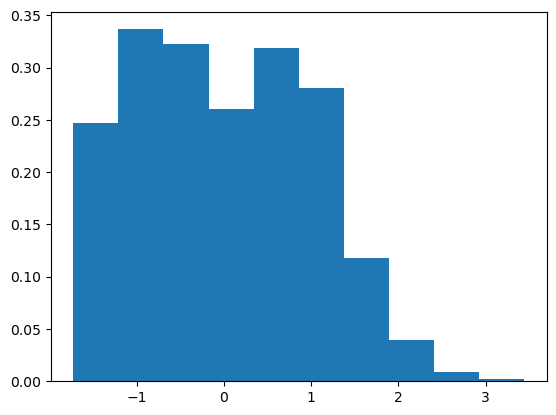

In [163]:
plt.hist(X_train['AGEP'], density=True)

###TODO : Conservez le calcul effectué pour la standardisation du jeu de données en utilisant le pa-
ckage joblib https://joblib.readthedocs.io/en/latest/index.html#module-joblib
et plus spécifiquement la méthode dump pour conserver un objet Python dans un fichier.

### 3. Recherche de bons modèles

3.1. Random Forest


3.1.1. Qualité d’apprentissage avec le paramétrage par défaut.


In [164]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

y_pred_rf

/home/sacha/miniconda3/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([ True,  True, False, ..., False, False, False])

In [165]:
accuracy = accuracy_score(y_test, y_pred_rf)
f_score = f1_score(y_test, y_pred_rf)

print("Accuracy: ", accuracy, f"\nF1 Score: ", f_score)

Accuracy:  0.8154405796230045 
F1 Score:  0.7728231506494467


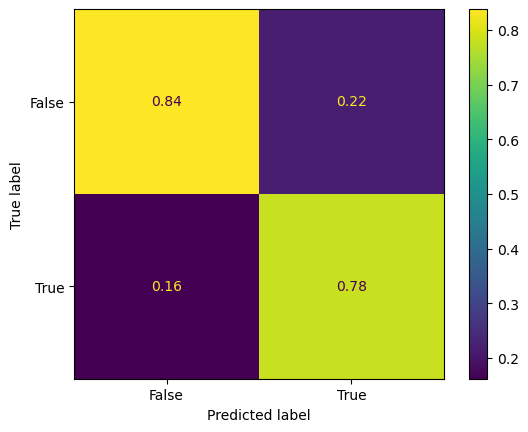

In [166]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, normalize='pred')

validation croisée (TP2 sacha alone sad snif snif)

In [167]:
from sklearn.model_selection import cross_val_predict

y_cross_pred= cross_val_predict(rf,X_train_scaled,y_train,cv=5)
accuracy_cross = accuracy_score(y_train,y_cross_pred)


print("Accuracy: ", accuracy_cross)
#on utilise pas test car le dataset est deja assez grand


/home/sacha/miniconda3/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sacha/miniconda3/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sacha/miniconda3/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sacha/miniconda3/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarni

Accuracy:  0.8118266998480116


In [168]:
f_score_cross = f1_score(y_train, y_cross_pred)
print(f"\nF1 Score avec valisation croisée: ", f_score_cross)
print(f"\nF1 Score ", f_score)


F1 Score avec valisation croisée:  0.7671031823960476

F1 Score  0.7728231506494467


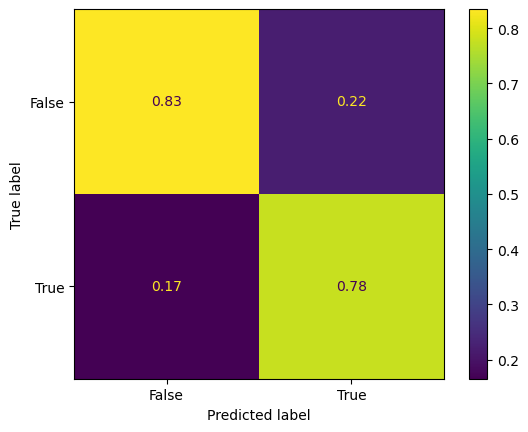

In [169]:
disp = ConfusionMatrixDisplay.from_predictions(y_train, y_cross_pred, normalize='pred')

3.1.2 Amélioration du modèle Random Forest



In [170]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [171]:
X_small, _,y_small, _ = train_test_split(X_train_scaled, y_train, test_size=0.5, random_state=42)

#On prend 60% du set de test pour accelerer


In [172]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100],       # Nombre d'arbres
    'max_depth': [None, 10, 20],        # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],    # Minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]       # Minimum d'échantillons dans une feuille
}

rf_cv = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=5,             # Nombre de plis pour la validation croisée
                           scoring='accuracy',  # Métrique d'évaluation
                           verbose=2)        # Utiliser tous les cœurs pour accélérer


 #rf_cv.fit(X_small, y_small)





In [173]:
"""print("Meilleurs paramètres :",rf_cv.best_params_)

# Meilleur score obtenu
print("Meilleur score :", rf_cv.best_score_)

# Modèle ajusté avec les meilleurs paramètres
best_model_rf = rf_cv.best_estimator_

# Évaluer sur l'ensemble de test
test_accuracy = best_model_rf.score(X_test, y_test)
print("accuracy :", test_accuracy)"""


'print("Meilleurs paramètres\xa0:",rf_cv.best_params_)\n\n# Meilleur score obtenu\nprint("Meilleur score\xa0:", rf_cv.best_score_)\n\n# Modèle ajusté avec les meilleurs paramètres\nbest_model_rf = rf_cv.best_estimator_\n\n# Évaluer sur l\'ensemble de test\ntest_accuracy = best_model_rf.score(X_test, y_test)\nprint("accuracy\xa0:", test_accuracy)'

3.1.3  Enregistrement du meilleur modèle Rf

In [174]:
##joblib.dump(best_model_rf,'RandomForest_BestModel_08166.joblib')

2. AdaBoost

In [212]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

y_pred_ab = ab.predict(X_test)

/home/sacha/miniconda3/envs/clustering-tp/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sacha/miniconda3/envs/clustering-tp/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy:  0.8083155458016414 
F1 Score:  0.7651911320615747


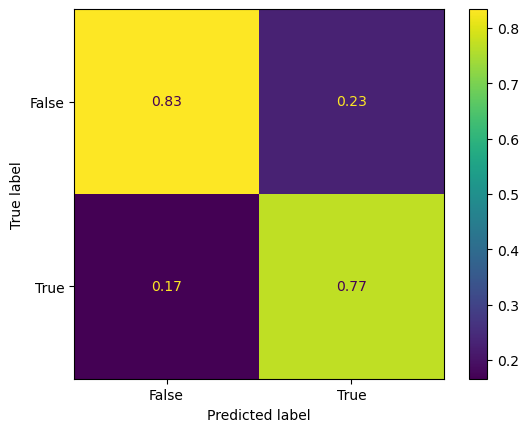

In [213]:
accuracy = accuracy_score(y_test, y_pred_ab)
f_score = f1_score(y_test, y_pred_ab)

print("Accuracy: ", accuracy, f"\nF1 Score: ", f_score)

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ab, normalize='pred')

validation croisée

/home/sacha/miniconda3/envs/clustering-tp/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sacha/miniconda3/envs/clustering-tp/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/sacha/miniconda3/envs/clustering-tp/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sacha/miniconda3/envs/clustering-tp/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME

Accuracy cross validation Ada boost:  0.8091042707063284

F1 Score Ada boost avec valisation croisée:  0.764783964273587

F1 Score  0.7651911320615747


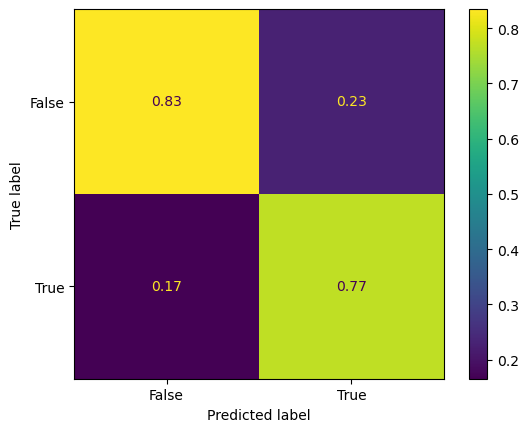

In [177]:
from sklearn.model_selection import cross_val_predict 

y_cross_pred= cross_val_predict(ab,X_train_scaled,y_train,cv=5)
accuracy_cross_ab = accuracy_score(y_train,y_cross_pred)


print("Accuracy cross validation Ada boost: ", accuracy_cross_ab)
#on utilise pas test car le dataset est deja assez grand
f_score_cross = f1_score(y_train, y_cross_pred)
print(f"\nF1 Score Ada boost avec valisation croisée: ", f_score_cross)
print(f"\nF1 Score ", f_score)
disp = ConfusionMatrixDisplay.from_predictions(y_train, y_cross_pred, normalize='pred')

recherche best param


In [178]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],        # Nombre d'estimateurs
    'learning_rate': [0.01, 0.1, 1.0],    # Taux d'apprentissage
}

# GridSearchCV avec validation croisée
ab_cv = GridSearchCV(
    estimator=ab,
    param_grid=param_grid,
    scoring='accuracy',  # Métrique principale
    cv=5,
    verbose=1
)

# Entraînement
#ab_cv.fit(X_train, y_train)


In [179]:
"""# Meilleurs paramètres
print("Meilleurs paramètres ada boost: ", ab_cv.best_params_)

# Évaluation sur le test set
best_model = ab_cv.best_estimator_
accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Accuracy sur le test set : ", accuracy)"""


'# Meilleurs paramètres\nprint("Meilleurs paramètres ada boost: ", ab_cv.best_params_)\n\n# Évaluation sur le test set\nbest_model = ab_cv.best_estimator_\naccuracy = accuracy_score(y_test, best_model.predict(X_test))\nprint("Accuracy sur le test set : ", accuracy)'

enregistrement meilleur score

In [180]:
#joblib.dump(best_model,'AdaBoost_BestModel_08167.joblib')

3. XGBoost

In [214]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test)

Accuracy:  0.8250909418873824 
F1 Score:  0.7868083547086845


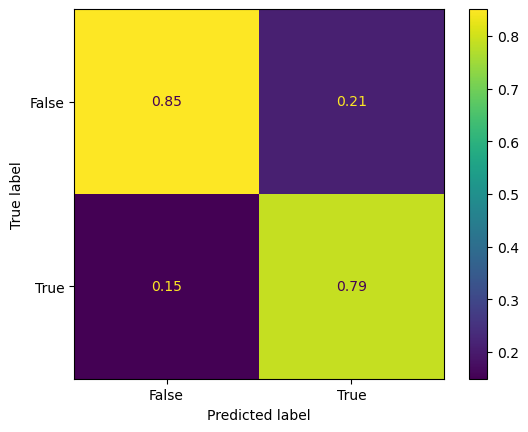

In [216]:
accuracy = accuracy_score(y_test, y_pred_xgb)
f_score = f1_score(y_test, y_pred_xgb)

print("Accuracy: ", accuracy, f"\nF1 Score: ", f_score)

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, normalize='pred')

validation croisée 

Accuracy:  0.8239857698795784

F1 Score:  0.7846186860687315


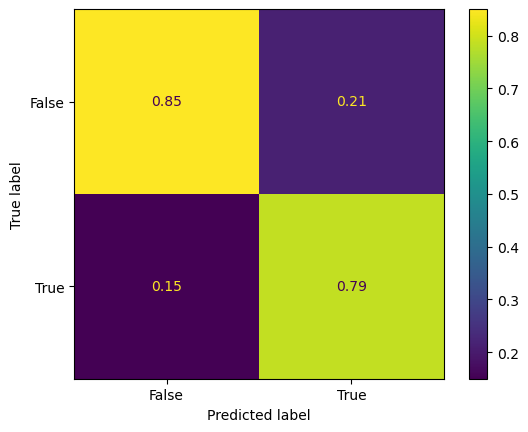

In [183]:
from sklearn.model_selection import cross_val_predict 

xgb_y_cross_pred= cross_val_predict(xgb,X_train_scaled,y_train,cv=5)
xgb_accuracy_cross = accuracy_score(y_train,xgb_y_cross_pred)


print("Accuracy: ", xgb_accuracy_cross)
f_score_cross = f1_score(y_train, xgb_y_cross_pred)
print(f"\nF1 Score: ", f_score_cross)

disp = ConfusionMatrixDisplay.from_predictions(y_train, xgb_y_cross_pred, normalize='pred')

3.2.2 Meilleur model


In [184]:
#On display les params pour trouver ceux qui seront interessants à changer
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [185]:
from sklearn.model_selection import GridSearchCV
# Définition de la grille de paramètres
param_grid = {
    'n_estimators': [100, 200, 300],  # Nombre d'arbres
    'max_depth': [3, 5, 7],           # Profondeur maximum des arbres
    'learning_rate': [0.01, 0.1, 0.2], # Taux d'apprentissage
    'subsample': [0.8, 1.0],          # Fraction des échantillons utilisée par arbre
    
}


# GridSearch avec validation croisée
xgb_cv = GridSearchCV(estimator=xgb, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5, 
                           verbose=1)

# Exécution de la recherche
#xgb_cv.fit(X_train_scaled, y_train)

In [186]:
"""# Affichage des meilleurs paramètres
print("Meilleurs paramètres : ", xgb_cv.best_params_)

# Évaluation du meilleur modèle sur les données de test
best_model = xgb_cv.best_estimator_
accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Accuracy sur le test set : ", accuracy)"""

'# Affichage des meilleurs paramètres\nprint("Meilleurs paramètres : ", xgb_cv.best_params_)\n\n# Évaluation du meilleur modèle sur les données de test\nbest_model = xgb_cv.best_estimator_\naccuracy = accuracy_score(y_test, best_model.predict(X_test))\nprint("Accuracy sur le test set : ", accuracy)'

In [187]:
#joblib.dump(best_model,'XGB_BestModel_08252.joblib')

3.5 Inférence sur d'autres jeux de données

In [188]:
df_attributes_co = pd.read_csv('db_co/acsincome_co_features.csv')
df_labels_co = pd.read_csv('db_co/acsincome_co_label.csv')

df_attributes_ne = pd.read_csv('db_ne/acsincome_ne_features.csv')
df_labels_ne = pd.read_csv('db_ne/acsincome_ne_labelTP2.csv')


In [189]:
df_attributes_co


,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
0,19.0,2.0,19.0,5.0,2850.0,6.0,17.0,2.0,2.0,9.0
1,24.0,5.0,18.0,5.0,9645.0,13.0,17.0,40.0,1.0,2.0
2,22.0,1.0,19.0,5.0,1520.0,53.0,17.0,45.0,2.0,1.0
3,32.0,1.0,16.0,1.0,4055.0,8.0,16.0,40.0,2.0,1.0
4,19.0,2.0,19.0,5.0,2006.0,34.0,17.0,9.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
31301,52.0,1.0,21.0,1.0,5000.0,35.0,0.0,40.0,2.0,1.0
31302,54.0,1.0,19.0,1.0,910.0,35.0,1.0,40.0,1.0,1.0
31303,39.0,1.0,22.0,1.0,1021.0,207.0,0.0,40.0,1.0,6.0
31304,39.0,1.0,24.0,1.0,2205.0,207.0,1.0,40.0,2.0,6.0


In [190]:
df_attributes_ne 


,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
0,19.0,1.0,19.0,5.0,3960.0,31.0,17.0,20.0,2.0,1.0
1,22.0,4.0,19.0,5.0,4622.0,46.0,17.0,30.0,1.0,1.0
2,19.0,1.0,19.0,5.0,6260.0,31.0,17.0,40.0,1.0,1.0
3,50.0,1.0,20.0,4.0,9620.0,31.0,17.0,10.0,1.0,1.0
4,18.0,1.0,18.0,5.0,3960.0,31.0,17.0,20.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
10780,59.0,1.0,20.0,5.0,1430.0,20.0,0.0,50.0,1.0,1.0
10781,59.0,3.0,22.0,3.0,1360.0,8.0,0.0,45.0,2.0,1.0
10782,62.0,1.0,19.0,3.0,20.0,19.0,0.0,50.0,2.0,1.0
10783,47.0,1.0,16.0,5.0,6050.0,31.0,0.0,65.0,1.0,1.0


On réutilise le scaler précédent pour fit les nouveaux jeux de données, et on va prédire avec nos modeles entrainés

In [191]:
X_ne_scaled = scaler.fit_transform(df_attributes_ne)
X_co_scaled = scaler.fit_transform(df_attributes_co)

In [192]:
y_ne_rf = rf.predict(X_ne_scaled)
y_co_rf = rf.predict(X_co_scaled)

/home/sacha/miniconda3/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/sacha/miniconda3/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [193]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Évaluer les prédictions pour le Nevada
accuracy_nevada = accuracy_score(df_labels_ne, y_ne_rf)
conf_matrix_nevada = confusion_matrix(df_labels_ne, y_ne_rf)
print("Nevada Accuracy:", accuracy_nevada)
print("Nevada Confusion Matrix:\n", conf_matrix_nevada)



# Évaluer les prédictions pour le Colorado
accuracy_co = accuracy_score(df_labels_co, y_co_rf)
conf_matrix_co = confusion_matrix(df_labels_co, y_co_rf)
print("Nevada Accuracy:", accuracy_co)
print("Nevada Confusion Matrix:\n", conf_matrix_co)


Nevada Accuracy: 0.6545201668984701
Nevada Confusion Matrix:
 [[4843 2574]
 [1152 2216]]
Nevada Accuracy: 0.6762920845844247
Nevada Confusion Matrix:
 [[12318  6016]
 [ 4118  8854]]


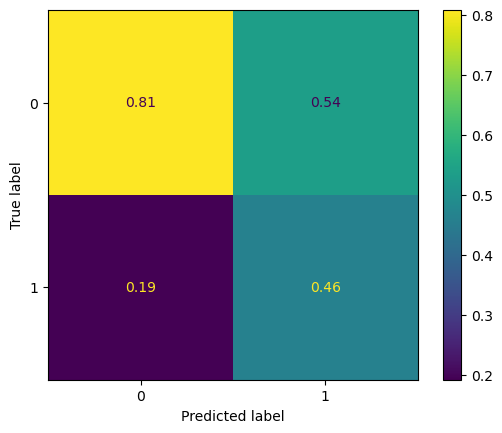

In [194]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(df_labels_ne, y_ne_rf, normalize='pred')

pas ouf ouf ce random forest

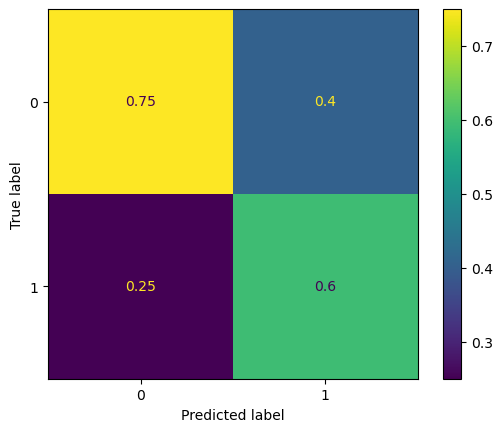

In [195]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(df_labels_co, y_co_rf, normalize='pred')

/home/sacha/miniconda3/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/home/sacha/miniconda3/envs/clustering-tp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


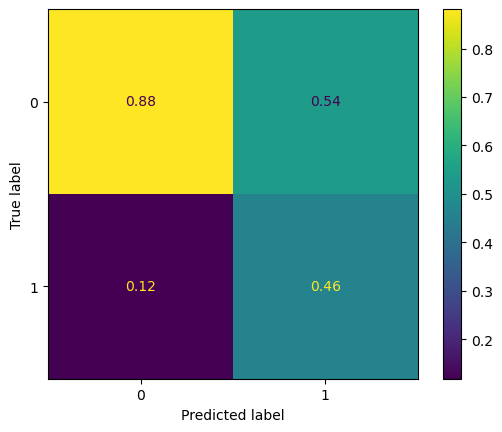

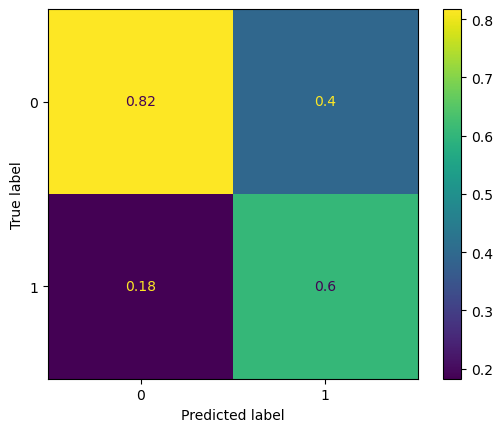

In [196]:
y_ne_rf = ab.predict(X_ne_scaled)
y_co_rf = ab.predict(X_co_scaled)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Évaluer les prédictions pour le Nevada
accuracy_nevada = accuracy_score(df_labels_ne, y_ne_rf)
conf_matrix_nevada = confusion_matrix(df_labels_ne, y_ne_rf)

accuracy_nevada
conf_matrix_nevada

# Évaluer les prédictions pour le Colorado
accuracy_co = accuracy_score(df_labels_co, y_co_rf)
conf_matrix_co = confusion_matrix(df_labels_co, y_co_rf)

accuracy_co
conf_matrix_co


disp1 = ConfusionMatrixDisplay.from_predictions(df_labels_ne, y_ne_rf, normalize='pred')
disp2 = ConfusionMatrixDisplay.from_predictions(df_labels_co, y_co_rf, normalize='pred')


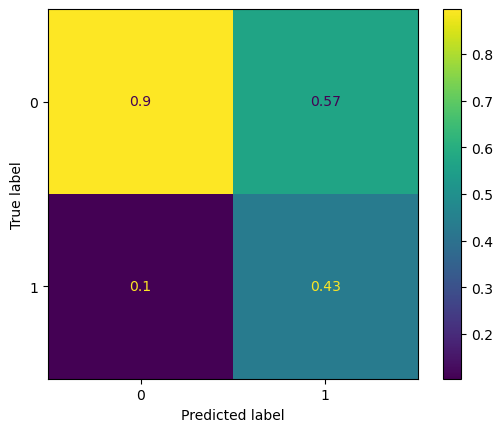

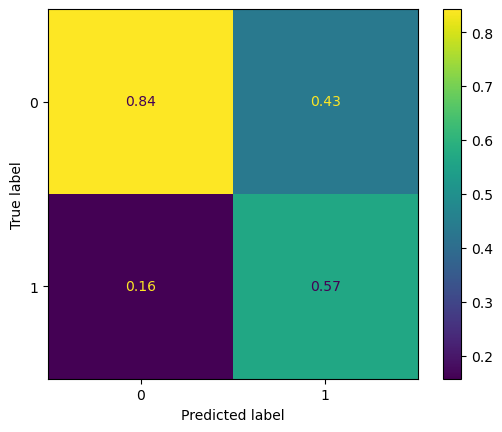

In [197]:
y_ne_rf = xgb.predict(X_ne_scaled)
y_co_rf = xgb.predict(X_co_scaled)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Évaluer les prédictions pour le Nevada
accuracy_nevada = accuracy_score(df_labels_ne, y_ne_rf)
conf_matrix_nevada = confusion_matrix(df_labels_ne, y_ne_rf)

accuracy_nevada
conf_matrix_nevada

# Évaluer les prédictions pour le Colorado
accuracy_co = accuracy_score(df_labels_co, y_co_rf)
conf_matrix_co = confusion_matrix(df_labels_co, y_co_rf)

accuracy_co
conf_matrix_co


disp1 = ConfusionMatrixDisplay.from_predictions(df_labels_ne, y_ne_rf, normalize='pred')
disp2 = ConfusionMatrixDisplay.from_predictions(df_labels_co, y_co_rf, normalize='pred')


#### 4. Interprétabilité et Equité

In [209]:
from sklearn.feature_selection import r_regression
from matplotlib.colors import Normalize

def correlation(feature, label, title):
    corr=r_regression(feature,label)
    norm= Normalize(min(corr),max(corr))
    cmap=plt.cm.cividis
    colors = cmap(norm(corr))
    
    plt.barh(feature.columns, corr, color=colors)
    plt.axvline(0,color='pink')
    plt.ylabel("features")
    plt.xlabel("Labels")
    plt.title(title)


/home/sacha/miniconda3/envs/clustering-tp/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


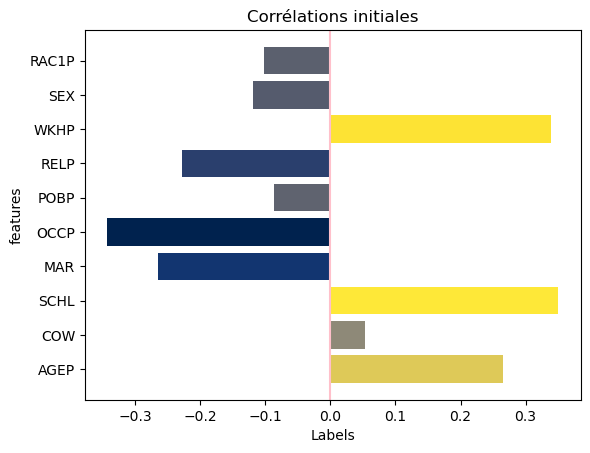

In [210]:
correlation(df_attributes,df_labels,"Corrélations initiales")

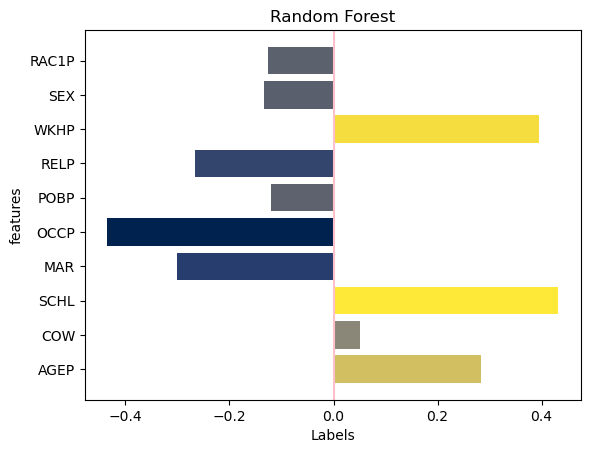

In [211]:
correlation(X_test_scaled,y_pred_rf,"Random Forest")

In [ ]:
#  RandomForest 
importances = rf.feature_importances_


feature_importance_df = pd.DataFrame({
    'feature': X_train_scaled.columns,  
    'importance': importances
})

#trier ordre croissant
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)


  feature  importance
4    OCCP    0.259094
0    AGEP    0.172103
7    WKHP    0.139889
2    SCHL    0.131369
5    POBP    0.086413
6    RELP    0.080016
1     COW    0.043537
3     MAR    0.033615
9   RAC1P    0.032818
8     SEX    0.021148


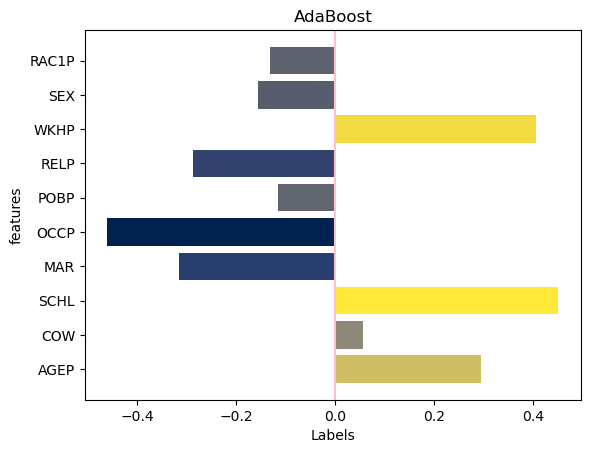

In [218]:
correlation(X_test_scaled,y_pred_ab,"AdaBoost")

In [220]:
#  adaboost
importances = ab.feature_importances_


feature_importance_df = pd.DataFrame({
    'feature': X_train_scaled.columns,  
    'importance': importances
})

#trier ordre croissant
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)


  feature  importance
4    OCCP        0.40
0    AGEP        0.14
7    WKHP        0.14
2    SCHL        0.08
6    RELP        0.08
1     COW        0.06
5    POBP        0.04
3     MAR        0.02
8     SEX        0.02
9   RAC1P        0.02


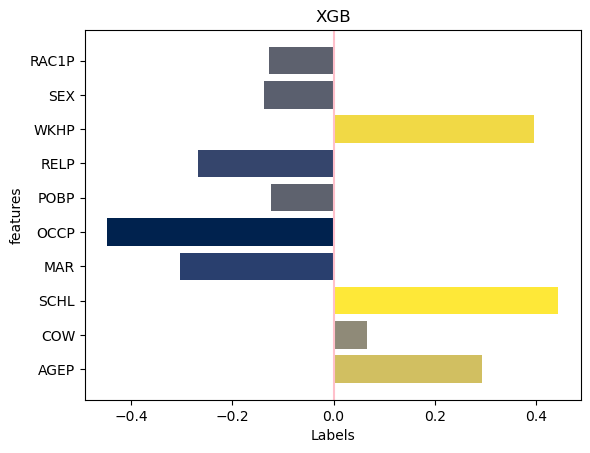

In [217]:
correlation(X_test_scaled,y_pred_xgb,"XGB")

In [221]:
#  XGB
importances = xgb.feature_importances_


feature_importance_df = pd.DataFrame({
    'feature': X_train_scaled.columns,  
    'importance': importances
})

#trier ordre croissant
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)


  feature  importance
7    WKHP    0.179109
6    RELP    0.168179
4    OCCP    0.162301
2    SCHL    0.153532
8     SEX    0.125415
0    AGEP    0.074258
1     COW    0.043802
3     MAR    0.038356
5    POBP    0.034011
9   RAC1P    0.021038


TODO : inférence à la main


4.2 Equité des modèles